In [1]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
import jax.numpy as jnp

summer_fits = Polyfit('summer_data/fits.npz', input_h5='summer_data/inputdata.h5',
 order=3, covariance = True, fit_obs = list(range(1,16)), cpu = True)
#take first two bins of first 15 observables
target_bins = [i for i in range(8*15) if i%8 == 0 or i%8 == 1]
summer_tune_no_err = Paramtune('summer_data/fits.npz', 'summer_data/HEPData-ins1736531-v1-csv.h5',
 covariance = False, target_bins = target_bins)
summer_tune_cov = Paramtune('summer_data/fits.npz', 'summer_data/HEPData-ins1736531-v1-csv.h5',
 covariance = True, target_bins = target_bins)


Filtered 782 of 134343 total bins for invalid input
Choosing to fit observables with ['d01-', 'd02-', 'd03-', 'd04-', 'd05-', 'd06-', 'd07-', 'd08-', 'd09-', 'd10-', 'd11-', 'd12-', 'd13-', 'd14-', 'd15-']
Fitting 945 of 945: /ATLAS_2019_I1736531/d15-x01-y01[AUX_pdfup]#6               
Fits written to summer_data/fits.npz
loading  summer_data/fits.npz
Calculated inital guess:  [0.12935856]
Tuned Parameters:  [0.1294486] , Objective =  2889.040973934358 , chi2/ndf =  99.62210254946062
Covariance of Tuned Parameters:  [[9.22864526e-07]]
loading  summer_data/fits.npz
Calculated inital guess:  [0.12618639]
Tuned Parameters:  [-0.01227653] , Objective =  31.9470316278707 , chi2/ndf =  1.1016217802714035
Covariance of Tuned Parameters:  [[0.00065789]]


target deviation 32.0585, with confidence level 0.6827, edof 29.0000
target deviation 32.0585, with confidence level 0.6827, edof 29.0000


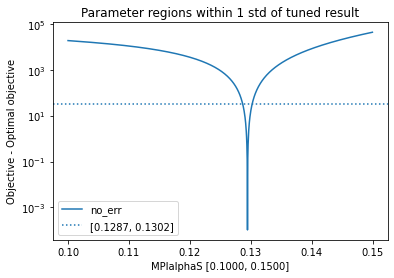

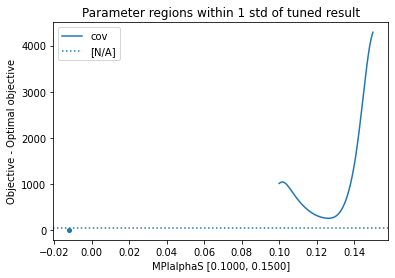

In [5]:
graph_range = [0.1, 0.15]
summer_tune_no_err.graph_objective(graph_range = graph_range, )
summer_tune_cov.graph_objective(new_figure = False, graph_range = graph_range)

In [ ]:
summer_tune_no_err.graph_envelope_target()